<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/PARCIAL2/2puntoparcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Instalamos las librerias necesarias
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf
import pandas as pd
import matplotlib as mpl
import yt_dlp as youtube_dl
import subprocess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 12.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 8.8 MB/s eta 0:00:00
  Created w

In [2]:
#Definimos la funcion de descarga del video
def descarga(video_url,name):
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

In [4]:
#Ingreso de la cancion y toma de la muestra
Cancion = input("Ingrese el link de su cancion favorita: ")
descarga(Cancion,'Cancion')

subprocess.call(['ffmpeg','-y', '-i', 'Cancion'+'.mp3',
                   'Cancion'+'.wav'])

puntolec = np.array([40])    # Punto de lectura de la canción ingresada será en 20 segundos
tm = 5    #segundos de muestra
fs = 48000    #frecuencia de muestreo de un video en youtube
vt = np.arange(0,5,1/fs)   #vector de tiempo
XC = np.zeros((1, int(tm * fs), 2))

x, fs = sf.read('/content/Cancion.wav')
for i,ti in enumerate(puntolec):
  XC[i] = x[int(fs*ti):int(fs*(ti+tm)),:] #aquí se crea la muestra de 5s de la cancion ingresada

XC1 = XC[0,:,0]

Ingrese el link de su cancion favorita: https://www.youtube.com/watch?v=pbTtQ9EYZw0
[youtube] Extracting URL: https://www.youtube.com/watch?v=pbTtQ9EYZw0
[youtube] pbTtQ9EYZw0: Downloading webpage
[youtube] pbTtQ9EYZw0: Downloading android player API JSON
[youtube] pbTtQ9EYZw0: Downloading ios player API JSON
[youtube] pbTtQ9EYZw0: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=pbTtQ9EYZw0
[youtube] pbTtQ9EYZw0: Downloading webpage
[youtube] pbTtQ9EYZw0: Downloading android player API JSON
[youtube] pbTtQ9EYZw0: Downloading ios player API JSON
[youtube] pbTtQ9EYZw0: Downloading m3u8 information
[info] pbTtQ9EYZw0: Downloading 1 format(s): 251
[download] Cancion.mp3 has already been downloaded
[download] 100% of    2.86MiB


In [5]:
#Definicion señal portadora
Amp = float(max(abs(XC1)))    #considerando Im=1
Señalp = Amp*np.cos(2*np.pi*15000*vt)

In [7]:
#Modulacion de la señal
Modulacion = (1+XC1/Amp)*Señalp

In [8]:
#Transformadas de Fourier de las señales

Vfreq = np.fft.rfftfreq(len(Señalp),1/fs)    #vector de frecuencias
TransEnt = np.fft.rfft(XC1)    #transformada de la entrada
Transp = np.fft.rfft(Señalp)    #transformada portadora
Transm = np.fft.rfft(Modulacion)   #transformada modulacion

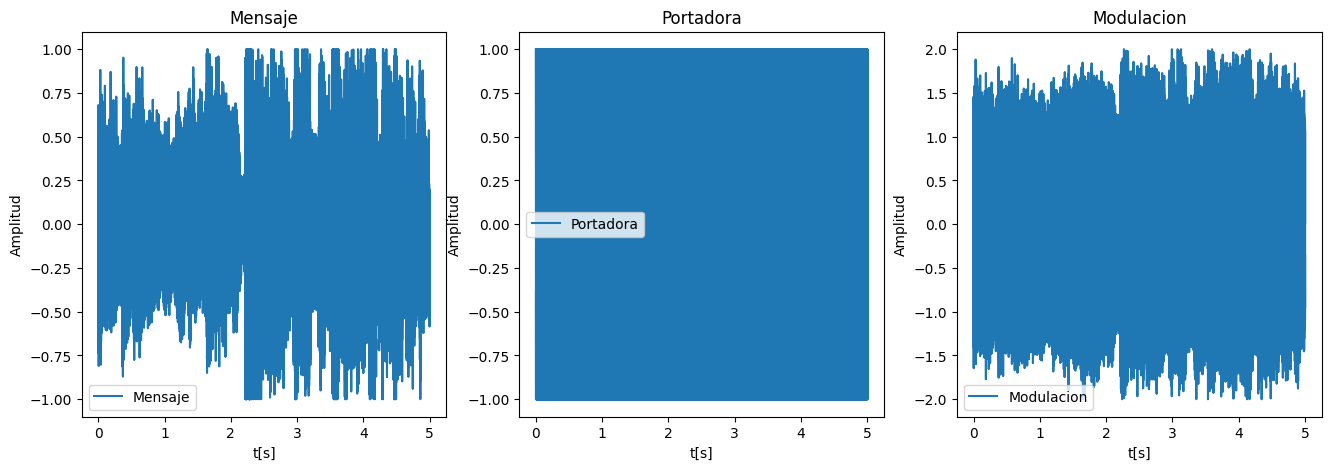

In [9]:
#Gráficas en el tiempo

plt.figure(figsize=(16,5))

plt.subplot(131)
plt.title('Mensaje')
plt.plot(vt,XC1,label='Mensaje')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(132)
plt.title('Portadora')
plt.plot(vt,Señalp,label='Portadora')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(133)
plt.title('Modulacion')
plt.plot(vt,Modulacion,label='Modulacion')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.show()

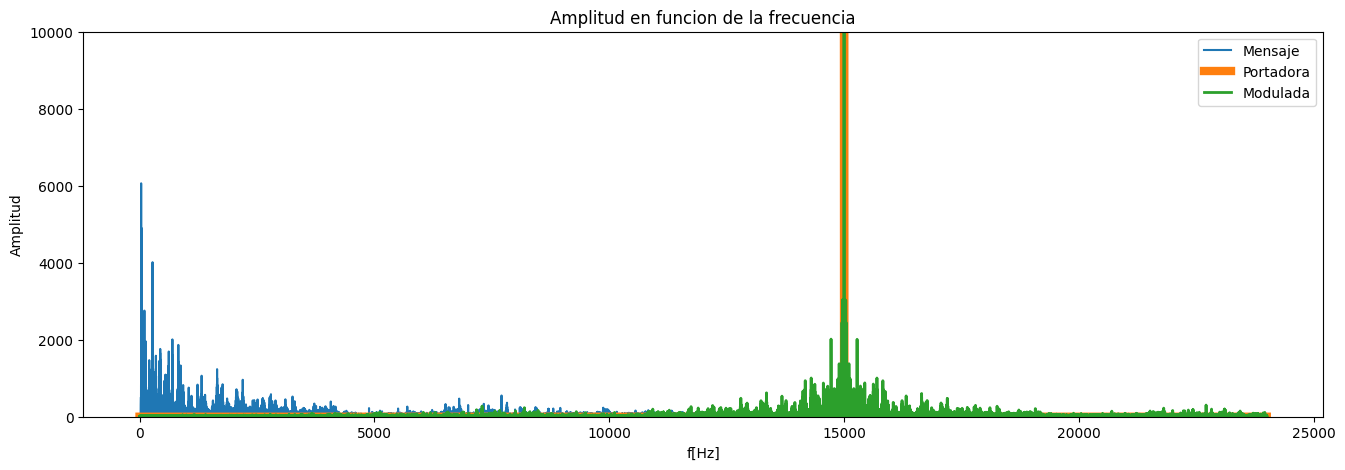

In [12]:
#Gráficas en la frecuencia
plt.figure(figsize=(16,5))
plt.ylim([min(abs(XC1)), 10000*max(abs(XC1))])
plt.plot(Vfreq,TransEnt,label='Mensaje') #Grafica Mensaje
plt.plot(Vfreq,Transp,label='Portadora',linewidth=6) #Grafica Portadora
plt.plot(Vfreq,Transm,label='Modulada',linewidth=2) #Grafica Modulada
plt.title('Amplitud en funcion de la frecuencia')
plt.xlabel('f[Hz]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

In [13]:
Audio(XC1.T,rate=fs)

In [14]:
Audio(Señalp,rate=fs)

In [15]:
Audio(Modulacion,rate=fs)